# Conference Scheduler: Parts 1 and 2

Author: Lucas Hansen  
Course: **CSE 5350**  
Date: October 2018  
Repository: https://github.com/lchansen/CSE5350  
Language: Python 3.6  

## Notes to Instructor:
- Though the assignment documentation specified the inclusion of the code at the end, I felt it more beneficial for reviewers to include the report/write-up inline with the code in this notebook.
- If the instructor is not familiar with jupyter/ipython notebooks, this file is composed of cells that either render markdown content or run python code
- More information on the workspace environment below
- I has to use a line plot (plt.plot) instead of a histogram because for large values of N, the histrgram would not render properly

## Computing Envoronment
### Operating System
- I am developing on OSX
- Python, as well as my specific implementation, is platform agnostic

### Opening ConferenceScheduler.ipynb
1. This file is not meant to be viewed as plain text
2. [Download an Anaconda distribution for your OS](https://www.anaconda.com/download)
3. Navigate to the project directory
4. Run the Command `jupyter notebook`
5. You should be directed to your default web browser (http://localhost:8888/tree). If not, follow the instructions printed to the console by jupyter
6. Open this File
7. [OPTIONAL] [Read More](https://jupyter.readthedocs.io/en/latest/install.html#installing-jupyter-using-anaconda-and-conda)

### Running the Code
- To view the output of this code, you don't even need to run anything! 
- If the cell doesn't have anything below it, it doesn't output anything.
- If you wish to run the code, you may need to change N/S/K at the top of the code section
- Clicking on Help > User Interface Tour gill give you a tutorial on how to run the code

Boiling it down into simple steps that don't involve learning how to use the IDE:  
1. In the header menu, click Cell>Run All
2. View Results

**or**

1. Click on the first code cell
2. Click the 'play' button in the page header to run one cell
3. Continue clicking play to progressively run each cell, one at a time

# Part 1 (Updated Since Turned in on October 11th)

# Distribution Generation

N, S and K are input variables from the project spec  
This notebook runs all 4 distributions (and graphs them), thus there is no need to track a `dist` varaible

In [1]:
N = 100  # N = Number of sessions (MAX = 10,000)
S = 500 # S = Number of attendees. (MAX = 100,000)
K = 10   # K = Number of sessions per attendee. (MAX = N for uniform and two-tiered distributions;  MAX = 0.1N for Skewed distribution and your distribution)
DIST = "UNIFORM" # UNIFORM | TIERED | SKEWED | YOURS

## Convert Attendee->Session Adjacency List to Session->Attendee

### Description
I am only putting `gen_sessions_attendees` up here since these functions must be defined before they are used to show the histogram/plot. In order to visualize the distributions of attendees between sessions, we must convert the attendee_sessions adj. matrix to the sessions_attendee adjacency list. Here, we simply loop through each individual attendee in the attendees->sessions adj. list. We then take the index of the attendee, and add that attendee ID to each if his or her sessions' guest lists.

### Code

In [2]:
def gen_sessions_attendees(attendees_sessions, N):
    #instantiate 2D array instead of using nested list comprehensions 
    sessions_attendees = [ [] for _ in range(N)]
    for attendee_index, attendee_sessions in enumerate(attendees_sessions):
        for session in attendee_sessions:
            sessions_attendees[session].append(attendee_index)
    return sessions_attendees
            
def gen_sessions_attendees_count(sessions_attendees):
    return [len(attendees) for attendees in sessions_attendees]

### Time and Space Complexity  

Algorithm is:  

- O(n) on N. There is one loop that generates a list to hold each session's guest list

- O(n) on S. The number computations to generate more attendees increases linearly with S.

- O(n) on K. Increasing K by one unit means that one more computation must be done for each attendee

- O(S\*K) on S and K. There is a nested loop to traverse the attendee_sessions itineraries. It's bounds for each level are based on attendees and the number of sessions that attendee will be attending.

Therefore, the algorithm is bounded by a time and space complexity O(S\*K) because it is the largest bound seen in the algorithm.

## Uniform Distrubution

### Description  
The outer loop is indexed on attendees, while the inner loop is indexed on sessions that attendee wishes to attend. Each cell in this '2D matrix' is simply populated by a function call to get a random number between 0 (first session) and N-1 (last session). Assuming ideal random conditions, rotating the martix about 'Sessions' will show that each session has about the same number of attendees.

### Code

In [3]:
from random import random
def uniform(N):
    return int(N*random())

def gen_uniform_list(N, K):
    sessions = set()
    while len(sessions) < K:
        sessions.add(uniform(N))
    return list(sessions)

def generate_uniform_dist(N, S, K):
     return [ gen_uniform_list(N, K) for _ in range(S)]

### Time and Space Complexity  

Algorithm is:  

- O(1) on N. It is simply a scalar that represents a specific session for an attendee. Increasing the value of N does not change the amount of steps required to generate a distribution.

- O(n) on S. The number computations and storage space used to generate more attendees increases proportionally with S.

- O(n) on K. Increasing K by one unit means that one more computation must be done for each attendee, and one more unit of storage space must be used. 

Therefore, the overall algorithm is bounded by a time and space complexity of O(SK), each S and K linearly affect both running time and storage space used (storage apace referring to the generated output)

### Visualization

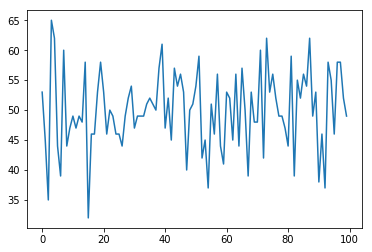

CPU times: user 349 ms, sys: 43.8 ms, total: 393 ms
Wall time: 391 ms


In [4]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
attendees_sessions_uniform = generate_uniform_dist(N, S, K)
sessions_attendees_uniform = gen_sessions_attendees(attendees_sessions_uniform, N)
sessions_attendees_uniform_count = gen_sessions_attendees_count(sessions_attendees_uniform)
plt.plot(sessions_attendees_uniform_count)
plt.show()

## Tiered Distrubution

### Description  
The outer loop is indexed on attendees, while the inner loop is indexed on sessions that attendee wishes to attend. Each cell in this '2D matrix' is simply populated by a function call to get a random number between 0 (first session) and N-1 (last session). In order to generate the tiers, we need 2 random numbers. the first one determines which tier the user's session will lie in. The second random number follows a uniform distribution within each of the two tiers. Inverting the martix about 'Sessions' will show that the bottom 10% of sessions will have as many attendees as the upper 90% of sessions (area under each tier will be equal).

### Code

In [5]:
def sessions_tiered(N):
    if random() >.5:
        return uniform(0.1*N)
    else:
        return int(.1 * N + uniform(int(N-(.1 * N))))
    
def gen_tiered_list(N, K):
    sessions = set()
    while len(sessions) < K:
        sessions.add(sessions_tiered(N))
    return list(sessions)

def generate_tiered_dist(N, S, K):
    return [gen_tiered_list(N, K) for _ in range(S)]

### Time and Space Complexity  

Algorithm is:  

- O(1) on N. It is simply a scalar that represents a specific session for an attendee. Increasing the value of N does not change the amount of steps required to generate a distribution.

- O(n) on S. The number computations and storage space used to generate more attendees increases linearly with S.

- O(n) on K. Increasing K by one unit means that one more computation must be done for each attendee, one more unit of storage space must also be occupied

Therefore, the algorithm is bounded by a time and space complexity O(SK). Each S and K linearly affect both running time and storage space used (storage apace referring to the generated output)

### Visualization

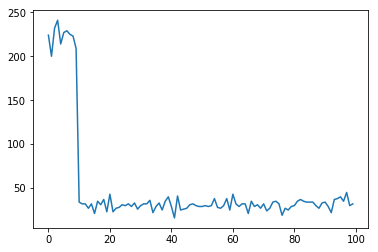

CPU times: user 76.4 ms, sys: 4.65 ms, total: 81.1 ms
Wall time: 79.6 ms


In [6]:
%%time
%matplotlib inline
attendees_sessions_tiered = generate_tiered_dist(N, S, K)
sessions_attendees_tiered = gen_sessions_attendees(attendees_sessions_tiered, N)
sessions_attendees_tiered_count = gen_sessions_attendees_count(sessions_attendees_tiered)
plt.plot(sessions_attendees_tiered_count)
plt.show()

## Skewed Distrubution

### Description  
My *skew* variable is an array which includes `N zeros, N-1 ones, N-2 twos ... N-k k's` where k is a session number less than N. This *skew* array is then passed to a function returns the session number from a uniform-randomly generated index of the array. The outer loop of generate_skewed_dist is indexed on attendees, while the inner loop is indexed on sessions that attendee wishes to attend. Each cell in this '2D matrix' is simply populated by a function call to get a skewed-random number between 0 (first session) and N-1 (last session). Inverting the martix about 'Sessions' will show a that the number of attendees per session decreases relatively linearly as the session number increases.

### Code

In [7]:
def gen_skew_list(N):
    skew = []
    for curr_session in range(N):
        for _ in range(N-curr_session):
            skew.append(curr_session)
    return skew

def session_skewed(N, skew):
    return skew[ uniform(len(skew)) ]

def gen_skewed_list(N, skew, K):
    sessions = set()
    while len(sessions) < K:
        sessions.add(session_skewed(N, skew))
    return list(sessions)

def generate_skewed_dist(N, S, K):
    skew = gen_skew_list(N)
    return [ gen_skewed_list(N, skew, K) for _ in range(S)]

### Time and Space Complexity  
Algorithm is:  

- O(n^2) on N. The *skew* array has a length N*(N+1)/2 which resolve to a space and time complexity of O(N^2) because there are 2 multiples of N in the equation. 

- O(n) on S. The number computations and storage space used to generate more attendees increases linearly with S.

- O(n) on K. Increasing K by one unit means that one more computation must be done to pick another session for each attendee, one more unit of storage must also be taken.

The running time is asymptotically bound by O(SK) in one part of the algorithm. `gen_skew_list` however is only run once each time `generate_skewed_dist` is executed. `gen_skew_list` has a running time and space that is asymptotically bounded by the function O(N^2). Therefore, the algorithm is bounded by a time and space complexity O(SK + N^2), again, since SK and N^2 are disjoint operations within the same algorithm.

### Visualization

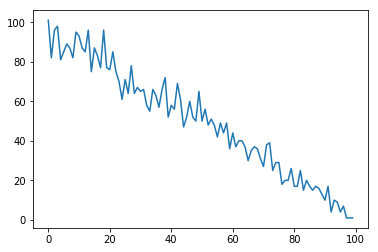

CPU times: user 80.3 ms, sys: 5.31 ms, total: 85.6 ms
Wall time: 83.3 ms


In [8]:
%%time
%matplotlib inline
attendees_sessions_skewed = generate_skewed_dist(N, S, K)
sessions_attendees_skewed = gen_sessions_attendees(attendees_sessions_skewed, N)
sessions_attendees_skewed_count = gen_sessions_attendees_count(sessions_attendees_skewed)
plt.plot(sessions_attendees_skewed_count)
plt.show()

## Custom Distrubution (Negative Exponential Distrubution)

### Description  
This distribution is achieved by generating a random numberbetween 0 and N-1, R, then generating a random number between 0 and R to use as the session number choice for the attendee. This distrubution heavily favors the lower session numbers and relatively rately chooses the high session numbers. This distribution is based on the principle of exponential distribution. I shose this because it seemed like an intersting way to model preferences at a high degree of prefernce towards mainstream speakers, with exponentially less preference towards lesser-knows spakers. Though there are 2 random numbers being generates the complexity is still O(n), since the random number generation is still a constant-time operation). The outer loop is indexed on attendees, while the inner loop is indexed on sessions that attendee wishes to attend. Each cell in this '2D matrix' is simply populated by a function call to get a random number between 0 (first session) and N-1 (last session). Assuming ideal random conditions, rotating the martix about 'Sessions' will show that each session has exponentially fewer attendees than the former.

### Code

In [9]:
def sessions_custom(N):
    return int( int(N*random()) * random() )

def gen_uniform_list(N, K):
    sessions = set()
    while len(sessions) < K:
        sessions.add(sessions_custom(N))
    return list(sessions)

def generate_custom_dist(N, S, K):
    return [gen_uniform_list(N, K) for _ in range(S)]

### Time and Space Complexity  
Algorithm is:  

- O(1) on N. It is simply a scalar that represents a specific session for an attendee. Even though we have 2 calls to random() here (as opposed to UNIFORM, increasing the value of N does not change the relative amount of steps required to generate a distribution.

- O(n) on S. The number computations and storage space used to generate more attendees increases linearly with S.

- O(n) on K. Increasing K by one unit means that one more computation must be done for each attendee, one more unit of data must be used too.

Therefore, the algorithm is bounded by a time and space complexity O(SK)

### Visualization

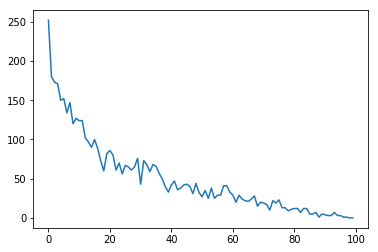

CPU times: user 107 ms, sys: 8.65 ms, total: 115 ms
Wall time: 110 ms


In [10]:
%%time
%matplotlib inline
attendees_sessions_custom = generate_custom_dist(N, S, K)
sessions_attendees_custom = gen_sessions_attendees(attendees_sessions_custom, N)
sessions_attendees_custom_count = gen_sessions_attendees_count(sessions_attendees_custom)
plt.plot(sessions_attendees_custom_count)
plt.show()


## Finding Pairwise Conflicts

### Description  
The function `gen_pairwise_conflicts` utilizes the combination function to generate unique session conflicts for a given attendee. The function `gen_all_pairwise_conflicts` applies this function to each attendee's list and aggregates the results. These specific functions do not remove duplicate session conflicts. That happens later.

### Code

In [11]:
%%time
from itertools import combinations
def gen_pairwise_conflicts(attendee_sessions):
    return list(combinations(attendee_sessions, 2))

def gen_all_pairwise_conflicts(attendees_sessions):
    all_conflicts = []
    for attendee_sessions in attendees_sessions:
        all_conflicts += gen_pairwise_conflicts(attendee_sessions)
    return all_conflicts

selected_dist = None
if DIST == "UNIFORM":
    selected_dist = attendees_sessions_uniform
elif DIST == "TIERED":
    selected_dist = attendees_sessions_tiered
elif DIST == "SKEWED":
    selected_dist = attendees_sessions_skewed
else:
    selected_dist = attendees_sessions_custom

conflicts = gen_all_pairwise_conflicts(selected_dist)

CPU times: user 2.03 ms, sys: 130 µs, total: 2.16 ms
Wall time: 2.16 ms


### Time and Space Complexity  
Algorithm is:  

- O(K^2) == O(K(K-1)/2) == O(K choose 2). `gen_pairwise_conflicts` running time can be modeled by nCr, where n=K and r=2. O(K choose 2) simplifies to O(K^2). 

- O(S). `gen_all_pairwise_conflicts` has the outer loop that calls the O(K^2) function. `gen_all's` running time withour the call to `gen_pairwise_conflicts` is bound by the number of attendees, S.

Therefore, the overall algorithm is bounded by a time and space complexity O( S*K^2 ), since it results from the combination of 2 functions that are O(S) and O(K^2)

## Removing Duplicates: Method 1, Adjacency Matrix

"Duplicate conflicts" are removed by inserting data into a NxN matrix, using session numbers as matrix indicies. This yields the space complexity of O(N^2), because we generate a NxN matrix to hold conflicts. One advantage of the adjacency matrix is that finding all conflicts for a given session is simply an O(1) operation (indexing the session), and a O(N) operation (you have to loop through that session's conflicts to determine which other sessions have their value set to 1). However, the disadvantage is that it requires O(N^2) space complexity, so it may ot perform well for larve numbers of sessions, but handles well with large values of S and K, as neither cause the space used to increase.

The biggest advantage is that you can find out of two sessions have conflicts in O(1) time, since youre checking two indicies to get a final value of 0 or 1.

Essentially, duplicates are removed by setting values in the matrix to 1 if there is a conflict. If a duplicate conflict comes along, a simple operation simply sets the existing conflict to be 1 again.

Printing the adjacency matrix flattens the NxN matrix into 2 1D arrays. P and E generation works by looping through the matrix, adding to the E array when it sees a value of 1 in the cell, and keeping track of the pointer in P.

In [12]:
def gen_unique_conflicts_adj_mtx(conflicts, N):
    #construct NxN matrix
    sessions_adj = [[0 for _ in range(N)] for _ in range(N)]
    for n1, n2 in conflicts:
        sessions_adj[n1][n2] = 1
        sessions_adj[n2][n1] = 1
    return sessions_adj

def gen_p_e_adj_mtx(sessions_conflicts_adj):
    p = []
    e = []
    curr_index = 0
    for session in sessions_conflicts_adj:
        p.append(curr_index+1)
        for index, conflict in enumerate(session):
            if conflict == 1:
                e.append(index)
                curr_index += 1
    return (p, e)


conflicts_adj_mtx = gen_unique_conflicts_adj_mtx(conflicts, N)
p, e = gen_p_e_adj_mtx(conflicts_adj_mtx)

f = open("output_adj_mtx.txt", 'w')
f.write("P[]:\n")
for elem in p:
    f.write("{}\n".format(elem))

f.write("E[]:\n")
for elem in e:
    f.write("{}\n".format(elem))
f.close()

## Removing Duplicates: Method 2, Adjacency List

In method 2, we remove duplicate conflicts by inserting every sesion conflict pair into an adjacency list, instead of a matrix. The main difference is the the adjacency list only occupies as much space as there are distinct conflicts. Therefore, this algorithm only requires the space complexity of O(M). This may be more ideal in terms of space, as long as M < N^2, but it is harder to lookup to see if a conflict exists, because it would have to involve a linear search through the second dimension of the adjacency list.

As time goes, this algorithm's time is asymptotically bound by O(MN)

Essentially, duplicates are removed by adding a conflicting session to a set, whose contents will not change if a duplicate is trying to be added, then casting it to a list.

Printing the adjacency matrix flattens the NxN matrix into 2 1D arrays. P and E generation works by looping through the adjacency list, appending the session's conflicts to E, and keeping track of the pointer in P.

In [13]:
def gen_unique_conflicts_adj_list(conflicts, N):
    sessions_adj = [set() for _ in range(N)]
    for n1, n2 in conflicts:
        sessions_adj[n1].add(n2)
        sessions_adj[n2].add(n1)
    for x in range(N):
        if x in sessions_adj[x]:
            sessions_adj[x].remove(x)
    return [list(session) for session in sessions_adj]

def gen_p_e_adj_list(conflicts_adj_list):
    p = []
    e = []
    curr_index = 0
    for session in conflicts_adj_list:
        p.append(curr_index+1)
        e += session
        curr_index += len(session)
    return (p, e)

conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)
p, e = gen_p_e_adj_list(conflicts_adj_list)

f = open("output_adj_list.txt", 'w')
f.write("P[]:\n")
for elem in p:
    f.write("{}\n".format(elem))

f.write("E[]:\n")
for elem in e:
    f.write("{}\n".format(elem))
f.close()

## Output


- N = Number of sessions (may be reduced to actual number to be scheduled)

- M = number of distinct pair-wise session conflicts.

- T = Total number of pair-wise session conflicts.

- S = Number of attendees.

- K = Number of sessions per attendee.

- DIST = UNIFORM | TIERED | SKEWED | YOURS

- E[] = adjacency list of distinct session conflicts (length = 2M)

- P[] = Pointer for each session I, 1 <= I <= N denoting the starting point in E[] of the list of sessions in conflict with session I. That is, the conflicts for session I are indicated in locations E[P[I]], E[P[I]+1], …, E[P[I+1]-1]. 

- An example output file will be provided on Canvas.

In [14]:
print("N = {}".format(N))
print("M = {}".format(int(len(e)/2)))
print("T = {}".format(len(conflicts)))
print("S = {}".format(S))
print("K = {}".format(K))
print("DIST = {}".format(DIST))

N = 100
M = 4902
T = 22500
S = 500
K = 10
DIST = UNIFORM


## Test Cases to Verify Asymptotic Bounds for *Distribution Functions*:

In [15]:
import time
def run_and_time_distribution(n, s, k, fun):
    start = time.time()
    distro = fun(n, s, k)
    elapsed = time.time()-start
    print("elapsed: {} for N:{}, S:{}, K{}".format(elapsed, n, s, k))
    return elapsed

def plot_tuples(tup_arr, xlabel, ylabel, title):
    x, y = zip(*tup_arr)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Distribution Function: UNIFORM
-----------------------------------------------------------------------------------
Complexity example, varying N on <function generate_uniform_dist at 0x10479c510>
elapsed: 0.04152393341064453 for N:50, S:10000, K5
elapsed: 0.0382838249206543 for N:100, S:10000, K5
elapsed: 0.037184953689575195 for N:250, S:10000, K5
elapsed: 0.03856778144836426 for N:1000, S:10000, K5
elapsed: 0.038865089416503906 for N:2500, S:10000, K5
elapsed: 0.03883481025695801 for N:10000, S:10000, K5


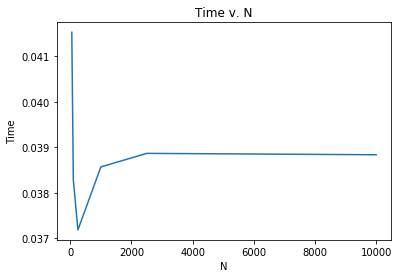

-----------------------------------------------------------------------------------
Complexity example, varying S on <function generate_uniform_dist at 0x10479c510>
elapsed: 0.0036749839782714844 for N:100, S:500, K10
elapsed: 0.007426023483276367 for N:100, S:1000, K10
elapsed: 0.01860213279724121 for N:100, S:2500, K10
elapsed: 0.07577681541442871 for N:100, S:10000, K10
elapsed: 0.19032812118530273 for N:100, S:25000, K10
elapsed: 0.7824711799621582 for N:100, S:100000, K10


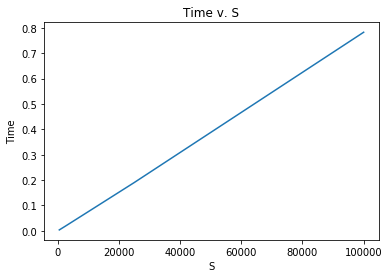

-----------------------------------------------------------------------------------
Complexity example, varying K on on <function generate_uniform_dist at 0x10479c510>
elapsed: 0.03978419303894043 for N:1000, S:10000, K5
elapsed: 0.07383394241333008 for N:1000, S:10000, K10
elapsed: 0.10654425621032715 for N:1000, S:10000, K15
elapsed: 0.15684080123901367 for N:1000, S:10000, K20
elapsed: 0.17242670059204102 for N:1000, S:10000, K25
elapsed: 0.2120189666748047 for N:1000, S:10000, K30


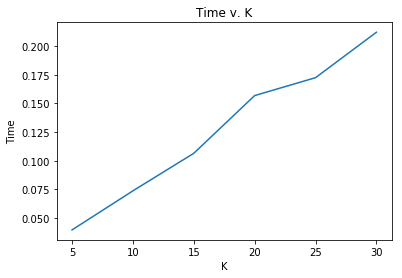

-----------------------------------------------------------------------------------
Distribution Function: TIERED
-----------------------------------------------------------------------------------
Complexity example, varying N on <function generate_tiered_dist at 0x10eaeb378>
elapsed: 0.051992177963256836 for N:50, S:10000, K5
elapsed: 0.04477286338806152 for N:100, S:10000, K5
elapsed: 0.042730093002319336 for N:250, S:10000, K5
elapsed: 0.04344606399536133 for N:1000, S:10000, K5
elapsed: 0.04591012001037598 for N:2500, S:10000, K5
elapsed: 0.04647707939147949 for N:10000, S:10000, K5


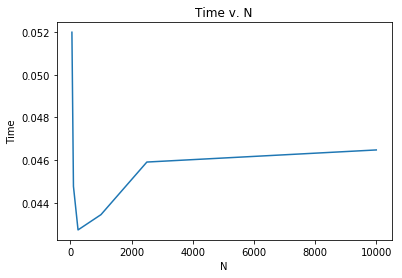

-----------------------------------------------------------------------------------
Complexity example, varying S on <function generate_tiered_dist at 0x10eaeb378>
elapsed: 0.004559755325317383 for N:100, S:500, K10
elapsed: 0.00921177864074707 for N:100, S:1000, K10
elapsed: 0.023526906967163086 for N:100, S:2500, K10
elapsed: 0.09526991844177246 for N:100, S:10000, K10
elapsed: 0.22973895072937012 for N:100, S:25000, K10
elapsed: 0.8889799118041992 for N:100, S:100000, K10


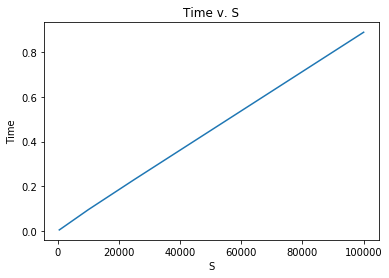

-----------------------------------------------------------------------------------
Complexity example, varying K on on <function generate_tiered_dist at 0x10eaeb378>
elapsed: 0.0469052791595459 for N:1000, S:10000, K5
elapsed: 0.08124899864196777 for N:1000, S:10000, K10
elapsed: 0.11976385116577148 for N:1000, S:10000, K15
elapsed: 0.1800379753112793 for N:1000, S:10000, K20
elapsed: 0.20007705688476562 for N:1000, S:10000, K25
elapsed: 0.23207902908325195 for N:1000, S:10000, K30


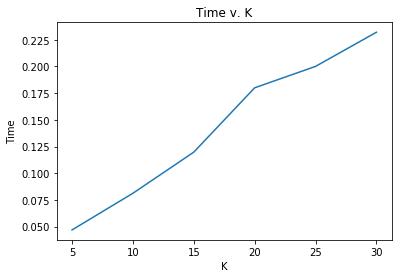

-----------------------------------------------------------------------------------
Distribution Function: SKEWED
-----------------------------------------------------------------------------------
Complexity example, varying N on <function generate_skewed_dist at 0x10eb6e048>
elapsed: 0.03876519203186035 for N:50, S:10000, K5
elapsed: 0.038836002349853516 for N:100, S:10000, K5
elapsed: 0.03742814064025879 for N:250, S:10000, K5
elapsed: 0.07595133781433105 for N:1000, S:10000, K5
elapsed: 0.3163580894470215 for N:2500, S:10000, K5
elapsed: 4.306966781616211 for N:10000, S:10000, K5


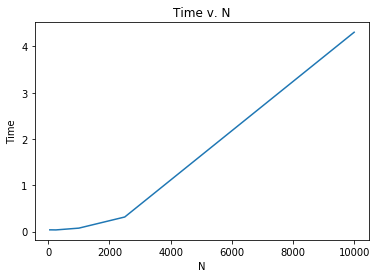

-----------------------------------------------------------------------------------
Complexity example, varying S on <function generate_skewed_dist at 0x10eb6e048>
elapsed: 0.0038208961486816406 for N:100, S:500, K10
elapsed: 0.0070688724517822266 for N:100, S:1000, K10
elapsed: 0.01769113540649414 for N:100, S:2500, K10
elapsed: 0.07393693923950195 for N:100, S:10000, K10
elapsed: 0.17252302169799805 for N:100, S:25000, K10
elapsed: 0.6827828884124756 for N:100, S:100000, K10


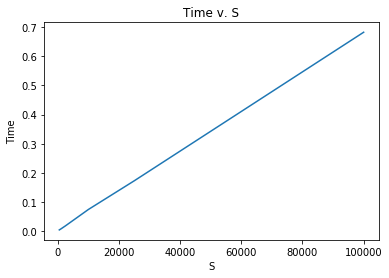

-----------------------------------------------------------------------------------
Complexity example, varying K on on <function generate_skewed_dist at 0x10eb6e048>
elapsed: 0.08252286911010742 for N:1000, S:10000, K5
elapsed: 0.10722208023071289 for N:1000, S:10000, K10
elapsed: 0.14294910430908203 for N:1000, S:10000, K15
elapsed: 0.20568490028381348 for N:1000, S:10000, K20
elapsed: 0.20463109016418457 for N:1000, S:10000, K25
elapsed: 0.2377760410308838 for N:1000, S:10000, K30


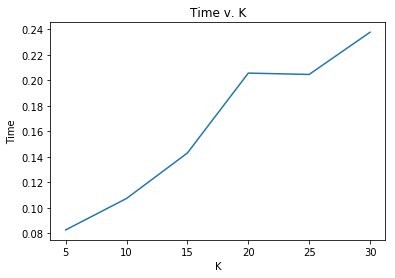

-----------------------------------------------------------------------------------
Distribution Function: CUSTOM
-----------------------------------------------------------------------------------
Complexity example, varying N on <function generate_custom_dist at 0x10479c598>
elapsed: 0.04127001762390137 for N:50, S:10000, K5
elapsed: 0.039437055587768555 for N:100, S:10000, K5
elapsed: 0.03473305702209473 for N:250, S:10000, K5
elapsed: 0.03652000427246094 for N:1000, S:10000, K5
elapsed: 0.03853416442871094 for N:2500, S:10000, K5
elapsed: 0.03689098358154297 for N:10000, S:10000, K5


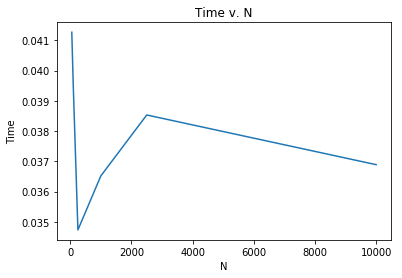

-----------------------------------------------------------------------------------
Complexity example, varying S on <function generate_custom_dist at 0x10479c598>
elapsed: 0.003625154495239258 for N:100, S:500, K10
elapsed: 0.007153034210205078 for N:100, S:1000, K10
elapsed: 0.018769264221191406 for N:100, S:2500, K10
elapsed: 0.0760040283203125 for N:100, S:10000, K10
elapsed: 0.17955517768859863 for N:100, S:25000, K10
elapsed: 0.7238998413085938 for N:100, S:100000, K10


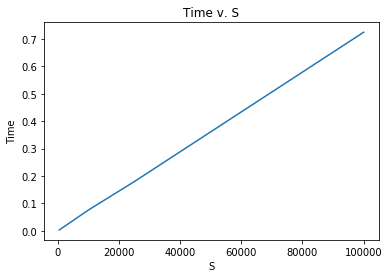

-----------------------------------------------------------------------------------
Complexity example, varying K on on <function generate_custom_dist at 0x10479c598>
elapsed: 0.039610862731933594 for N:1000, S:10000, K5
elapsed: 0.07139921188354492 for N:1000, S:10000, K10
elapsed: 0.10084319114685059 for N:1000, S:10000, K15
elapsed: 0.15223312377929688 for N:1000, S:10000, K20
elapsed: 0.16828417778015137 for N:1000, S:10000, K25
elapsed: 0.19708991050720215 for N:1000, S:10000, K30


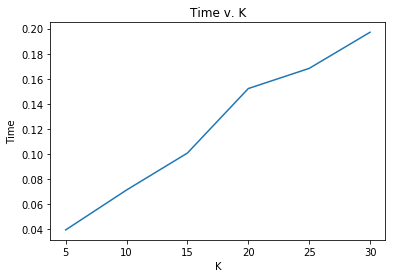

-----------------------------------------------------------------------------------


In [16]:
N_arr = [50, 100, 250, 1000, 2500, 10000]
S_arr = [500, 1000, 2500, 10000, 25000, 100000]
K_arr = [5, 10, 15, 20, 25, 30]
funcs = [(generate_uniform_dist, "UNIFORM"), (generate_tiered_dist, "TIERED"), (generate_skewed_dist, "SKEWED"), (generate_custom_dist, "CUSTOM") ]

for fun, name in funcs:
    print("Distribution Function: {}".format(name))
    print("-----------------------------------------------------------------------------------")
    print("Complexity example, varying N on {}".format(fun))
    N_vary = [(val, run_and_time_distribution(val, 10000, 5, fun) ) for val in N_arr]
    plot_tuples(N_vary, "N", "Time", "Time v. N")
    
    print("-----------------------------------------------------------------------------------")

    print("Complexity example, varying S on {}".format(fun))
    S_vary = [(val, run_and_time_distribution(100, val, 10, fun) ) for val in S_arr]
    plot_tuples(S_vary, "S", "Time", "Time v. S")
    
    print("-----------------------------------------------------------------------------------")

    print("Complexity example, varying K on on {}".format(fun))
    K_vary = [(val, run_and_time_distribution(1000, 10000, val, fun) ) for val in K_arr]
    plot_tuples(K_vary, "K", "Time", "Time v. K")
        
    print("-----------------------------------------------------------------------------------")

    

These graphs display how running time changes as N, S and K are varied across all four of my distribution functions. The results of these graphs are consistent with the explanations seen in Sections 2.2.3, 2.3.3, 2.4.3 and 2.5.3.

The one thing that really stands out is the graph the varies N for the SKEWED distribution. All other discribution functions are O(1) on N,except for this one, which generates N^2 = N+(N-1)+(N-2)... elements to be used as a pool from which a SKEWED discribution can be picked uniformly (see section 2.4).

## Test Cases to Verify Asymptotic Bounds for *Duplicate Removal Functions*:

In [17]:
import time
def run_and_time_dup_removal(N, S, K, fun):
    attendees_sessions_uniform = generate_uniform_dist(N, S, K)
    conflicts = gen_all_pairwise_conflicts(attendees_sessions_uniform)
    
    start = time.time()
    fun(conflicts, N)
    elapsed = time.time()-start
    print("elapsed: {} for Conflicts:{} on function {}".format(elapsed, len(conflicts), fun))
    return (len(conflicts), elapsed)

def plot_tuples(tup_arr, xlabel, ylabel, title):
    x, y = zip(*tup_arr)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Duplicate Removal Function: Adjacency MATRIX
elapsed: 0.00020766258239746094 for Conflicts:1000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.001394033432006836 for Conflicts:9000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.0047261714935302734 for Conflicts:31500 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.010612010955810547 for Conflicts:76000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.020914077758789062 for Conflicts:150000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.07603192329406738 for Conflicts:435000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.2404778003692627 for Conflicts:1190000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>
elapsed: 0.48474907875061035 for Conflicts:1950000 on function <function gen_unique_conflicts_adj_mtx at 0x10eb08bf8>


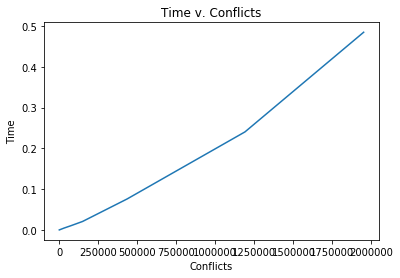

-----------------------------------------------------------------------------------
Duplicate Removal Function: Adjacency LIST
elapsed: 0.00029087066650390625 for Conflicts:1000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.0018618106842041016 for Conflicts:9000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.006261110305786133 for Conflicts:31500 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.016722917556762695 for Conflicts:76000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.031241178512573242 for Conflicts:150000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.11398601531982422 for Conflicts:435000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.4057788848876953 for Conflicts:1190000 on function <function gen_unique_conflicts_adj_list at 0x10eb8dae8>
elapsed: 0.6780290603637695 for Conflicts:195

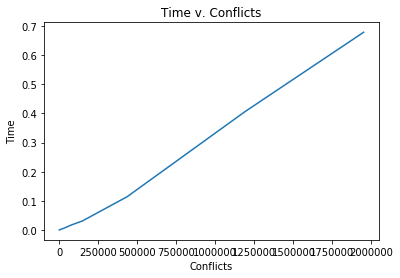

In [18]:
N_arr = [50, 100, 150, 200, 250, 500, 1000, 1500]
S_arr = [100, 200, 300, 400, 500, 1000, 2000, 2500]
K_arr = [5, 10, 15, 20, 25, 30, 35, 40]
    
print("Duplicate Removal Function: Adjacency MATRIX")
NSK = zip(N_arr, S_arr, K_arr)
matrix_results = [run_and_time_dup_removal(n, s, k, gen_unique_conflicts_adj_mtx) for n, s, k in NSK]
plot_tuples(matrix_results, "Conflicts", "Time", "Time v. Conflicts")
      
print("-----------------------------------------------------------------------------------")
      
print("Duplicate Removal Function: Adjacency LIST")
NSK = zip(N_arr, S_arr, K_arr)
list_results = [run_and_time_dup_removal(n, s, k, gen_unique_conflicts_adj_list) for n, s, k in NSK]
plot_tuples(list_results, "Conflicts", "Time", "Time v. Conflicts")



You can see how these functions that remove duplicate via adjacency matricies and adjacency lists remove duplicates in a time that are asymptotically bound by O(C) where C is equal to the total number of conflicts, including duplicates.

# Part 2 

Due December 4th

## Input from Part 1 (must run previous cells)

In [19]:
P = p
E = e
N = N
M = int(len(e)/2)
T = len(conflicts)
S = S
K = K
DIST = DIST

## Graph Coloring Method 1: Smallest Last Vertex Ordering(SLVO)

CSE 5350 student, electing to do Method 1, for now at least. 

### Convert P[] and E[] back to adjacency list

As a result of formatting my assignment in a manner where code is readable within the report, it didnt make sense to create a new program that interpreted the file output from the Project Part 1. In the spirit of the assignment, I still wrote code that read the P[] and E[] arrays and converted them back into an adjacency list for me to use as needed. It seemed more in-line with teh assignment than just directly reading the session conflict adjacency list from above. The only difference is that I do not utilize the actual text files output by Part 1.

This code works by looping through the P array. At every index i except the last, we take the subarray in E from P[i] to P[i+1] and add that to a new row in an adjacency list, with each 0-indexed row representing a session name. The "minus one's" serve to translate between the 1-indexed P array, to the 0-indexed format we use in Python. 

In [20]:
sessions_conflicts_adj_list = []
for session in range(len(P)):
    if session is not len(P)-1:
        sessions_conflicts_adj_list.append(E[ P[session]-1 : P[session+1]-1 ])
    else:
        sessions_conflicts_adj_list.append(E[ P[session]-1 :])

### Helper Functions
- `smallest_degree_session(slvo, adjacent)` receives the data structure specified in the assignment and the "field 1" (a.k.a. adjacent verticies) of one spefific vertex. Here we do a linear pass over the adjacent verticies to find the adjacent vertex with the lowest degree that has not itself been deleted.
- `adjacent_colors(slvo, vertex)` is used during coloring to determine the colors of a vertex's adjacent verticies, if they have even been colored yet)
- `smallest_int_not_in_list(arr)` is used to find the smallest integer not in a list. This is used during coloring to determine what color should be assigned to the given vertex, based on the colors of the adjacent verticies of it.

In [21]:
from itertools import count, filterfalse

def smallest_degree_session(slvo, adjacent):
    smallest_val = 1000000000
    smallest_idx = -1
    for session in adjacent:
        #only look at verticies that havent been deleted
        if slvo[session][2] > 0:
            if slvo[session][2] < smallest_val:
                smallest_val = slvo[session][2]
                smallest_idx = session
    return smallest_idx

def adjacent_colors(slvo, vertex):
    adjacents = slvo[vertex][1]
    colors = []
    for adj in adjacents:
        color = slvo[adj][2]
        if color is not -1:
            colors.append(color)
    return colors

def smallest_int_not_in_list(arr):
    colors = set(arr)
    color = 0
    while color in arr:
        color+=1
    return color 

### Structure for SLVO

- Field 0 = Session Number

- Field 1 = P(I): Pointer to edge list

- Field 2 = a: Current Degree, b: -1 when deleted, c: Color value

- Field 3 = Unused: Recursive method using stack removes need for these pointers

### SLVO Algorithm

Due to the nature of Python, pointers (well, the python equivalent, references) are a bit harder to manage using the specific algorithm mentioned in the assignment. I took an interesting spin on the prompt and wrote the algorithm using a stack, instead of recursive function calls. 

I would like to break down the main algorithm of `svlo_color_adj_list(sessions_conflicts_adj_list)` into steps. First, generate slvo, the minimalist data structure specified in the assignment. Initialize a stack with the index/session #/vertex of the theire graph with the smallest degree. Loop while the stack is not empty. Peek the top element of the stack, curr_vertex. Get the adjacent vertex with the smallest degree. Return to the loop if all adjacent verticies have been deleted. Otherwise, delete and track the adjacent vertex with the smallest degree. Reduce the count of the deleted vertex's adjavent verticies. Add the deleted vertex to the stack, continue looping and recursively deleting its adjacent verticies until the base case is reached.

Once the main loop is completed, we can now color the graph. Since we have stored verticies in the prder they were deleted, we can use that information to color the verticies in the reverse order. Simply loop over the reversed deleted verticies and fetch the list of its adjacencies that have already been colored. If we are on the first iteration, the first vertex will be "colored zero". As we go on, `adjacent_colors` and `smallest_int_not_in_list` give us a way of looping over the slvo data structure and choose appripoiate colors for the . rest of the verticies in the graph. 

In [22]:
def svlo_color_adj_list(sessions_conflicts_adj_list, logger=False):
    #generate structure
    slvo = [[session, conflicts, len(conflicts)] for session, conflicts in enumerate(sessions_conflicts_adj_list)]
    
    #Algorithm
    stack = []
    deleted = [] # tuples: (deleted_vertex, degree_when_deleted)

    init_smallest = smallest_degree_session(slvo, [x[0] for x in slvo])
    stack.append(init_smallest)
    deleted.append( (init_smallest, slvo[init_smallest][2]) )

    #delete by smallest vertex
    while len(stack) > 0:
        curr_vertex = stack[-1] #top of stack (peek)

        #get adjacent vertex of smallest degree (that hasn't been deleted)
        smallest_degree_adj = smallest_degree_session(slvo, slvo[curr_vertex][1])

        #base case, reached vertex, who has all its verticies deleted
        if smallest_degree_adj is -1:
            stack.pop()
            continue

        #delete smallest exting neighbour of curr_vertex
        deleted.append( (smallest_degree_adj, slvo[smallest_degree_adj][2]) )
        slvo[smallest_degree_adj][2] = -1

        for adj_to_smallest in slvo[smallest_degree_adj][1]:
            if slvo[adj_to_smallest][2] > 0:
                slvo[adj_to_smallest][2] -= 1

        #add "deleted" vertex to stack, to greedily/recursively follow its neighbours
        stack.append(smallest_degree_adj)
        #End While

    reverse_deleted = list(reversed(deleted))
    
    coloring_order = []
    degrees_deleted = []

    count = 0
    for vertex, degree in reverse_deleted:
        adj_colors = adjacent_colors(slvo, vertex)
        color = smallest_int_not_in_list(adj_colors)
        slvo[vertex][2] = color

        coloring_order.append(count)
        degrees_deleted.append(degree)
        
        if logger:
            #For each vertex (session) the color, original degree, and degree when deleted. These should be printed in the order colored.
            print("Vertex:{0:3}, Color:{1:3}, Original Degree:{2:3}, Deleted Degree:{3:3}".format(vertex, color, len(slvo[vertex][1]), degree))

        count += 1
        
    colored_slvo = slvo
    return (colored_slvo, reverse_deleted, coloring_order, degrees_deleted,)

### Results

Now that we have our algorithm, we can inspect its output to vertify its performance.  Here, I call the Smallest Last Vertex Ordering function by passing it an adjacency matrix of session conflicts. To visualize the how the graph is being colored, I have generated the graph below. The X-axis represents the order that the vertex was colored (reverse of the order they were deleted. The Y-axis represents the degree that that vertex was deleted. In summary, looking left-to-right on the graph, you can see how the "degree when deleted" changes as the the graph is colored. This is important because it demonstrates that the lowest-degree verticies are being recursively deleted first as the algorithm proceeds. This reverse coloring allows us to color highest degree verticies most efficently.

Vertex: 97, Color:  1, Original Degree: 99, Deleted Degree:  1
Vertex: 96, Color:  2, Original Degree: 99, Deleted Degree:  2
Vertex: 95, Color:  3, Original Degree: 98, Deleted Degree:  3
Vertex: 94, Color:  4, Original Degree: 98, Deleted Degree:  4
Vertex: 93, Color:  5, Original Degree: 98, Deleted Degree:  5
Vertex: 91, Color:  6, Original Degree: 99, Deleted Degree:  6
Vertex: 90, Color:  7, Original Degree: 97, Deleted Degree:  7
Vertex: 88, Color:  8, Original Degree: 98, Deleted Degree:  8
Vertex: 87, Color:  9, Original Degree: 99, Deleted Degree:  9
Vertex: 86, Color: 10, Original Degree: 99, Deleted Degree: 10
Vertex: 85, Color: 11, Original Degree: 99, Deleted Degree: 11
Vertex: 84, Color: 12, Original Degree: 99, Deleted Degree: 12
Vertex: 83, Color: 13, Original Degree: 98, Deleted Degree: 13
Vertex: 81, Color: 14, Original Degree: 99, Deleted Degree: 14
Vertex: 80, Color: 15, Original Degree: 98, Deleted Degree: 15
Vertex: 79, Color: 16, Original Degree: 98, Deleted Deg

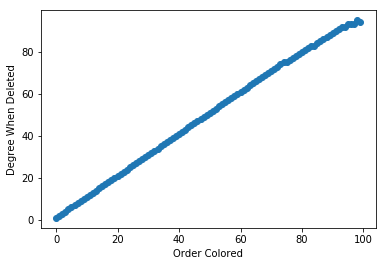

Max Degree When Deleted: 95
Colors Used            : 76
N                      : 100
S                      : 500
K                      : 10
DIST                   : UNIFORM


In [23]:
%matplotlib inline

colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(sessions_conflicts_adj_list, logger=True)

plt.scatter(coloring_order, degrees_deleted)
plt.xlabel("Order Colored")
plt.ylabel("Degree When Deleted")
plt.show()

print("Max Degree When Deleted: {}".format(max([del_degree for vertex, del_degree in reverse_deleted])))
print("Colors Used            : {}".format(len(set([vertex[2] for vertex in colored_slvo]))))
print("N                      : {}".format(N))
print("S                      : {}".format(S))
print("K                      : {}".format(K))
print("DIST                   : {}".format(DIST))


After the graph, we can also see some relevant data pertaining to it. `Colors Used` will give us a glimpse at how the graph is organized and how easily sessions can be mitigated. `Max degree When Deleted` gives us a hint about the vertex with the most conflicts, that also has adjacent verticies with the most conflicts! `N, S, K and DIST` are mainly included for reference, if the reader woult like to see the graph with different inputs.

## SLVO: Comparing Different Discributions

Since the output from the coloring function was already displayed with a uniform discribution (the abobe example next to the original code), I would like to display the coloring function's performance on all 4 distributions. 

### Uniform 

Vertex: 97, Color:  1, Original Degree: 99, Deleted Degree:  1
Vertex: 96, Color:  2, Original Degree: 99, Deleted Degree:  2
Vertex: 95, Color:  3, Original Degree: 98, Deleted Degree:  3
Vertex: 94, Color:  4, Original Degree: 98, Deleted Degree:  4
Vertex: 93, Color:  5, Original Degree: 98, Deleted Degree:  5
Vertex: 91, Color:  6, Original Degree: 99, Deleted Degree:  6
Vertex: 90, Color:  7, Original Degree: 97, Deleted Degree:  7
Vertex: 88, Color:  8, Original Degree: 98, Deleted Degree:  8
Vertex: 87, Color:  9, Original Degree: 99, Deleted Degree:  9
Vertex: 86, Color: 10, Original Degree: 99, Deleted Degree: 10
Vertex: 85, Color: 11, Original Degree: 99, Deleted Degree: 11
Vertex: 84, Color: 12, Original Degree: 99, Deleted Degree: 12
Vertex: 83, Color: 13, Original Degree: 98, Deleted Degree: 13
Vertex: 81, Color: 14, Original Degree: 99, Deleted Degree: 14
Vertex: 80, Color: 15, Original Degree: 98, Deleted Degree: 15
Vertex: 79, Color: 16, Original Degree: 98, Deleted Deg

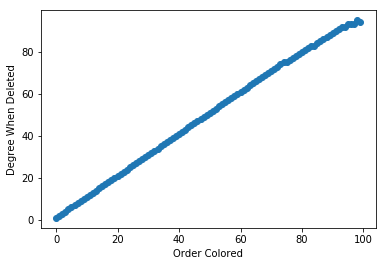

Max Degree When Deleted: 95
Colors Used            : 76
N                      : 100
S                      : 500
K                      : 10
DIST                   : UNIFORM


In [24]:
%matplotlib inline

conflicts = gen_all_pairwise_conflicts(attendees_sessions_uniform)
conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)

colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(conflicts_adj_list, logger=True)

plt.scatter(coloring_order, degrees_deleted)
plt.xlabel("Order Colored")
plt.ylabel("Degree When Deleted")
plt.show()

print("Max Degree When Deleted: {}".format(max([del_degree for vertex, del_degree in reverse_deleted])))
print("Colors Used            : {}".format(len(set([vertex[2] for vertex in colored_slvo]))))
print("N                      : {}".format(N))
print("S                      : {}".format(S))
print("K                      : {}".format(K))
print("DIST                   : {}".format(DIST))

### Tiered

Vertex: 95, Color:  1, Original Degree: 92, Deleted Degree:  1
Vertex: 94, Color:  2, Original Degree: 91, Deleted Degree:  2
Vertex: 93, Color:  3, Original Degree: 88, Deleted Degree:  3
Vertex: 91, Color:  4, Original Degree: 81, Deleted Degree:  4
Vertex: 85, Color:  5, Original Degree: 88, Deleted Degree:  5
Vertex: 82, Color:  6, Original Degree: 90, Deleted Degree:  6
Vertex: 79, Color:  7, Original Degree: 82, Deleted Degree:  7
Vertex: 73, Color:  8, Original Degree: 88, Deleted Degree:  8
Vertex: 67, Color:  9, Original Degree: 85, Deleted Degree:  9
Vertex: 66, Color: 10, Original Degree: 85, Deleted Degree: 10
Vertex: 63, Color: 11, Original Degree: 89, Deleted Degree: 11
Vertex: 47, Color: 12, Original Degree: 85, Deleted Degree: 12
Vertex: 44, Color: 13, Original Degree: 80, Deleted Degree: 13
Vertex: 40, Color: 14, Original Degree: 85, Deleted Degree: 14
Vertex: 39, Color: 15, Original Degree: 83, Deleted Degree: 15
Vertex: 38, Color: 16, Original Degree: 91, Deleted Deg

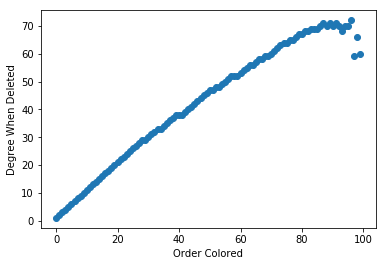

Max Degree When Deleted: 72
Colors Used            : 47
N                      : 100
S                      : 500
K                      : 10
DIST                   : UNIFORM


In [25]:
%matplotlib inline

conflicts = gen_all_pairwise_conflicts(attendees_sessions_tiered)
conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)

colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(conflicts_adj_list, logger=True)

plt.scatter(coloring_order, degrees_deleted)
plt.xlabel("Order Colored")
plt.ylabel("Degree When Deleted")
plt.show()

print("Max Degree When Deleted: {}".format(max([del_degree for vertex, del_degree in reverse_deleted])))
print("Colors Used            : {}".format(len(set([vertex[2] for vertex in colored_slvo]))))
print("N                      : {}".format(N))
print("S                      : {}".format(S))
print("K                      : {}".format(K))
print("DIST                   : {}".format(DIST))

### Skewed

Vertex: 70, Color:  1, Original Degree: 80, Deleted Degree:  1
Vertex: 64, Color:  2, Original Degree: 87, Deleted Degree:  2
Vertex: 63, Color:  3, Original Degree: 89, Deleted Degree:  3
Vertex: 62, Color:  4, Original Degree: 83, Deleted Degree:  4
Vertex: 60, Color:  5, Original Degree: 88, Deleted Degree:  5
Vertex: 59, Color:  6, Original Degree: 85, Deleted Degree:  6
Vertex: 57, Color:  7, Original Degree: 89, Deleted Degree:  7
Vertex: 56, Color:  8, Original Degree: 89, Deleted Degree:  8
Vertex: 55, Color:  9, Original Degree: 90, Deleted Degree:  9
Vertex: 54, Color: 10, Original Degree: 88, Deleted Degree: 10
Vertex: 53, Color: 11, Original Degree: 89, Deleted Degree: 11
Vertex: 52, Color: 12, Original Degree: 90, Deleted Degree: 12
Vertex: 51, Color: 13, Original Degree: 94, Deleted Degree: 13
Vertex: 50, Color: 14, Original Degree: 89, Deleted Degree: 14
Vertex: 47, Color: 15, Original Degree: 86, Deleted Degree: 15
Vertex: 46, Color: 16, Original Degree: 94, Deleted Deg

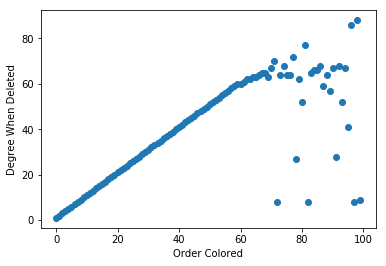

Max Degree When Deleted: 88
Colors Used            : 64
N                      : 100
S                      : 500
K                      : 10
DIST                   : UNIFORM


In [26]:
%matplotlib inline

conflicts = gen_all_pairwise_conflicts(attendees_sessions_skewed)
conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)

colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(conflicts_adj_list, logger=True)

plt.scatter(coloring_order, degrees_deleted)
plt.xlabel("Order Colored")
plt.ylabel("Degree When Deleted")
plt.show()

print("Max Degree When Deleted: {}".format(max([del_degree for vertex, del_degree in reverse_deleted])))
print("Colors Used            : {}".format(len(set([vertex[2] for vertex in colored_slvo]))))
print("N                      : {}".format(N))
print("S                      : {}".format(S))
print("K                      : {}".format(K))
print("DIST                   : {}".format(DIST))

### Custom

Vertex: 59, Color:  1, Original Degree: 79, Deleted Degree:  1
Vertex: 58, Color:  2, Original Degree: 79, Deleted Degree:  2
Vertex: 57, Color:  3, Original Degree: 72, Deleted Degree:  3
Vertex: 53, Color:  4, Original Degree: 80, Deleted Degree:  4
Vertex: 51, Color:  5, Original Degree: 77, Deleted Degree:  5
Vertex: 49, Color:  6, Original Degree: 80, Deleted Degree:  6
Vertex: 48, Color:  7, Original Degree: 81, Deleted Degree:  7
Vertex: 47, Color:  8, Original Degree: 76, Deleted Degree:  8
Vertex: 44, Color:  9, Original Degree: 81, Deleted Degree:  9
Vertex: 43, Color: 10, Original Degree: 82, Deleted Degree: 10
Vertex: 42, Color: 11, Original Degree: 78, Deleted Degree: 11
Vertex: 41, Color: 12, Original Degree: 81, Deleted Degree: 12
Vertex: 38, Color: 13, Original Degree: 76, Deleted Degree: 13
Vertex: 36, Color: 14, Original Degree: 82, Deleted Degree: 14
Vertex: 35, Color: 15, Original Degree: 87, Deleted Degree: 15
Vertex: 34, Color: 16, Original Degree: 88, Deleted Deg

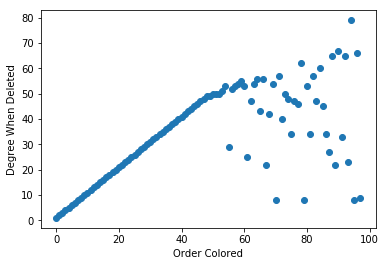

Max Degree When Deleted: 79
Colors Used            : 52
N                      : 100
S                      : 500
K                      : 10
DIST                   : UNIFORM


In [27]:
%matplotlib inline

conflicts = gen_all_pairwise_conflicts(attendees_sessions_custom)
conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)

colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(conflicts_adj_list, logger=True)

plt.scatter(coloring_order, degrees_deleted)
plt.xlabel("Order Colored")
plt.ylabel("Degree When Deleted")
plt.show()

print("Max Degree When Deleted: {}".format(max([del_degree for vertex, del_degree in reverse_deleted])))
print("Colors Used            : {}".format(len(set([vertex[2] for vertex in colored_slvo]))))
print("N                      : {}".format(N))
print("S                      : {}".format(S))
print("K                      : {}".format(K))
print("DIST                   : {}".format(DIST))

## SLVO: Asymptotic Bounds Analysis

### Time

In [28]:
import time
def run_and_time_slvo(N, S, K):
    attendees_sessions_uniform = generate_uniform_dist(N, S, K)
    conflicts = gen_all_pairwise_conflicts(attendees_sessions_uniform)
    conflicts_adj_list = gen_unique_conflicts_adj_list(conflicts, N)
    
    start = time.time()
    colored_slvo, reverse_deleted, coloring_order, degrees_deleted = svlo_color_adj_list(conflicts_adj_list, logger=False)
    elapsed = time.time()-start
    
    num_verticies = N
    num_edges = sum([len(adj) for adj in conflicts_adj_list])
    
    print("elapsed: {} for verticies:{}, edges:{} on SLVO".format(elapsed, num_verticies, num_edges))
    return (num_verticies, num_edges, elapsed)

def plot_tuples(tup_arr, xlabel, ylabel, title):
    x, y = zip(*tup_arr)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

elapsed: 0.00043320655822753906 for verticies:50, edges:822 on SLVO
elapsed: 0.0026929378509521484 for verticies:100, edges:5132 on SLVO
elapsed: 0.006565093994140625 for verticies:150, edges:14116 on SLVO
elapsed: 0.014105081558227539 for verticies:200, edges:26994 on SLVO
elapsed: 0.02191305160522461 for verticies:250, edges:44272 on SLVO
elapsed: 0.09020495414733887 for verticies:500, edges:163562 on SLVO


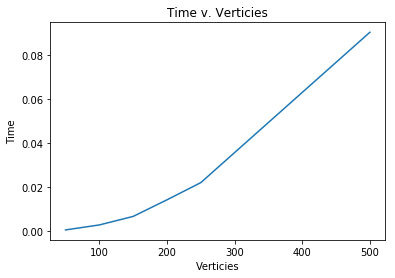

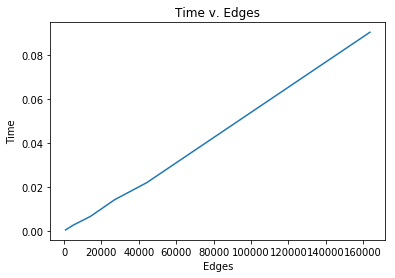

In [29]:
N_arr = [50, 100, 150, 200, 250, 500]
S_arr = [100, 200, 300, 400, 500, 1000]
K_arr = [5, 10, 15, 20, 25, 30]

NSK = zip(N_arr, S_arr, K_arr)
results = [run_and_time_slvo(n, s, k) for n, s, k in NSK]
verticies, edges, elapsed = zip(*results)
plot_tuples(zip(verticies, elapsed), "Verticies", "Time", "Time v. Verticies")
plot_tuples(zip(edges, elapsed), "Edges", "Time", "Time v. Edges")

According to Dr. Matula's paper provided to us, the graph should be colored in O(V+E) time. This prediction for E (edges) appears to hold. As E increases, the time appears to be asymptotically bound by O(E). However, the prediction for V (verticies) does not seem to hold. As V increases, the time appears to be asymptotically bound by O(V^2) which is not the intended result. Stepping through th code, it appears as though there may be some inefficiencies that could be reduced (such as vertex deletion), but so far, I have only managed to keep crashing the code. 

### Space

The only extra data we need to store here, besides the stack, is the in-order list of verticies that are deleted. This will eventually require we use O(V) extra space, where V = number of verticies. This is the space complexity predicted in Dr. Matula''s paper. 

## My First Failed Attempt (Not Part of Assignment)

I figured it might be wise to include this as a "lesson learned", this was a result of my first stab at the Smallest Vertex Last Ordering algorithm. I was able to reuse multiply components, and the overall structure is the same as it is now. I missed one key part of the assignment that said to "recursively delete a vertex of smallest degree, updating the third and forth fields of each data node to relate to the remaining graph, adding the vertex deleted to the ordered list of vertices deleted" with the key workd being **recursively**. I instead chose the smallest degree vertex of the entire graph, as opposed to the smallese degree vertex adjacent to the current one. I then realized we wanted a greedy algorithm and changed my code to the proper solution.

In [30]:
def smallest_session_degree_idx(slvo):
    smallest_val = 1000000000
    smallest_idx = -1
    for idx, session in enumerate(slvo):
        #only look at verticies that havent been deleted
        if session[2] is not -1:
            if len(session[1]) < smallest_val:
                smallest_val = len(session[1])
                smallest_idx = idx
    return smallest_idx

slvo = [[session, set(conflicts), len(conflicts)] for session, conflicts in enumerate(sessions_conflicts_adj_list)]

deleted = []

#delete by smallest vertex
while True:
    #get smallest degree vertex
    smallest_degree_idx = smallest_session_degree_idx(slvo)
    if smallest_degree_idx is -1:
        break #deleted all of them
        
    #delete smallest degree
    deleted.append(smallest_degree_idx)
    slvo[smallest_degree_idx][2] = -1
    
    
    #remove the vertex of smallest degree from any vertex it may be connected to (that hasnt been deleted)
    for idx in range(len(slvo)):
        #preserve degree when deleted
        if slvo[idx][2] is not -1:
            if smallest_degree_idx in slvo[idx][1]:
                slvo[idx][1].remove(smallest_degree_idx)
                slvo[idx][2] = len(slvo[idx][1])


# color verticies by reverse of order deleted
# first vertex deleted has color 0
#last vertex deleted has greatest color
reverse_deleted = list(reversed(deleted))
for idx, vertex in enumerate(reverse_deleted):
    slvo[vertex][2] = idx

oc = []
dd = []
for vertex in slvo:
    order_colored = vertex[2] #order colored is just the code for the color
    degree_when_deleted = len(vertex[1]) #set of adacent nodes (len==degree) is not modivied after the vertex is deleted
    oc.append(order_colored)
    dd.append(degree_when_deleted)